array([[<AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 1 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 5 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 20 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 60 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 120 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 240 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 720 minute(s)'}, ylabel='Frequency'>,
        <AxesSubplot:title={'center':'pairwise |corr(log returns)|, increment = 1400 minute(s)'}, ylabel='Frequency'>],
       [<AxesSubplot:title={'center':'pairwise |corr(log 

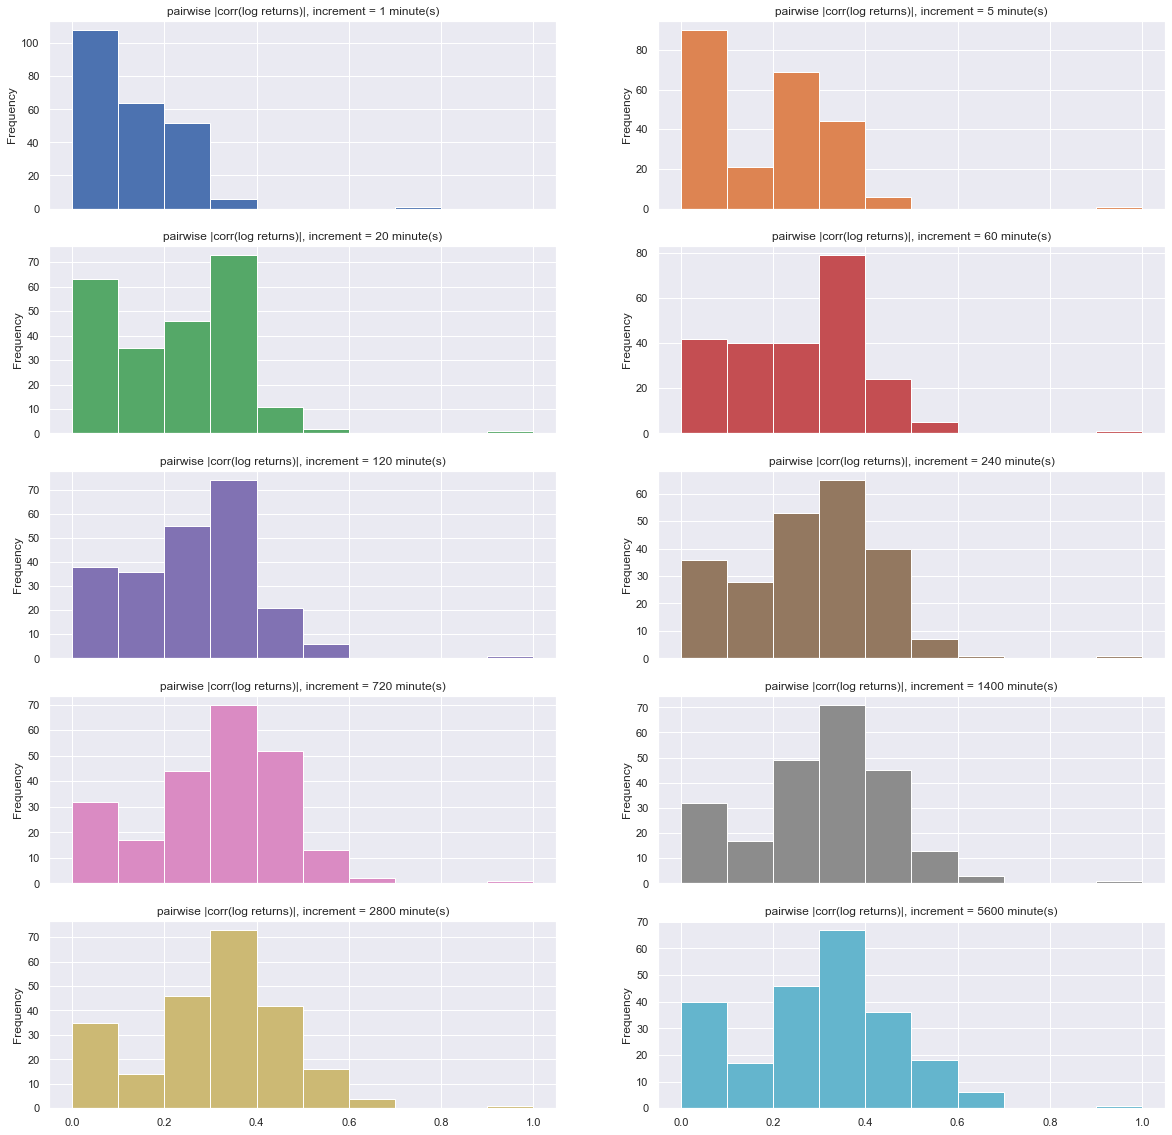

In [15]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import pprint as pp
import datetime as dt
import pathlib
import re
import json
import math
import matplotlib.pyplot as plt

symbols_list_file_name = "binance_BTC_from_2019_05_01_to_2022_04_30.json"
with open(symbols_list_file_name, "r") as f:
    symbols_list = json.load(f)
    
returns_folder_name = "full_returns"

symbols_list.remove('btcusdt') # it was too slow
# symbols_list.remove('ethbtc')

ts_list = []

for symbol in symbols_list:
    save_file_name = symbol + '.csv.gz'
    save_path = os.path.join(os.getcwd(), returns_folder_name, save_file_name)
    df = pd.read_csv(save_path, compression='gzip')
    ts_list.append(df['log_return'].rename(symbol))
all_returns_df = pd.concat(ts_list, axis=1)

def compute_abs_corr_df(input_df, increments_list):
    corr_series_list = []
    for increment in increments_list:
        df = input_df.groupby(input_df.index // increment).sum()
        corr_matrix = df.corr().abs()
        upper_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        corr_series = corr_matrix.where(upper_mask).stack()
        corr_series.rename(increment, inplace=True)
#         info_string = f"pairwise |corr(log returns)|, increment = {increment} minute(s)"
        corr_series_list.append(corr_series)
    return pd.concat(corr_series_list, axis=1)

increments_list = [1, 5, 20, 60, 120, 240, 720, 1400, 1400 * 2, 1400 * 4]
sns.set_context('paper')
sns.set(rc={'figure.figsize':(20,20)}) 

df = compute_abs_corr_df(all_returns_df, increments_list)

info_string_list = [f"pairwise |corr(log returns)|, increment = {increment} minute(s)" for increment in increments_list]

df.plot.hist(subplots=True, legend=False, layout=(5,2), title=info_string_list)

In [16]:
df.mean()

1       0.125405
5       0.188929
20      0.228428
60      0.255968
120     0.263046
240     0.281465
720     0.308506
1400    0.307032
2800    0.314800
5600    0.304133
dtype: float64

In [13]:
all_returns_df

,bnbbtc,adabtc,batbtc,btcusdc,neobtc,btctusd,etcbtc,ltcbtc,xrpbtc,trxbtc,...,zecbtc,qtumbtc,dcrbtc,xlmbtc,iotabtc,manabtc,dashbtc,zrxbtc,scbtc,repbtc
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000072,0.000000,0.000000,0.000000,0.000000,-0.000234,0.000000,-0.001148,0.000173,0.0,...,0.000000,0.000000,0.000000,0.000264,-0.000883,0.000522,0.000312,-0.000095,0.0,0.000251
2,0.000350,0.000379,-0.003975,0.000000,0.000546,-0.000003,-0.000905,0.000108,0.000173,0.0,...,-0.000395,0.000000,0.000000,-0.000529,-0.003186,0.000000,-0.000312,-0.000477,0.0,-0.000754
3,0.000881,-0.001138,-0.000909,0.000000,0.000546,0.000665,0.000000,0.000000,0.000086,0.0,...,0.000615,0.000000,0.000000,-0.002117,0.001948,-0.000522,0.000192,0.000191,0.0,0.000251
4,-0.001195,-0.000759,0.004536,0.000000,0.000273,-0.000402,-0.000453,-0.000826,0.000086,0.0,...,0.001711,0.000000,0.000000,0.000000,0.000708,-0.000522,0.000336,0.000191,0.0,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578235,0.000000,0.000249,0.000000,0.000037,-0.002242,0.000000,0.000000,-0.000393,-0.001608,0.0,...,0.000000,-0.001765,0.000341,0.000000,-0.000709,-0.001441,-0.001328,-0.000748,0.0,-0.001132
1578236,0.000150,0.000498,0.000000,0.000211,0.000000,0.000000,0.000000,0.000000,0.000322,0.0,...,-0.000330,-0.000353,0.000000,0.000000,0.000000,-0.006446,0.000443,-0.001248,0.0,0.000000
1578237,-0.000898,-0.000996,-0.001651,0.000072,-0.001123,0.000000,-0.000727,-0.000197,0.000000,0.0,...,-0.003635,-0.001769,0.000341,-0.001114,-0.002487,0.002373,-0.001994,0.000000,0.0,0.000000
1578238,0.000250,0.000747,0.000661,-0.000234,0.001123,0.000000,0.000000,0.000589,-0.000966,0.0,...,0.001984,0.000354,0.000000,0.000000,0.000711,0.001447,0.000665,-0.003502,0.0,0.000000


In [14]:
zero_df = all_returns_df == 0
zero_df.sum() / 15782.4

bnbbtc      4.116104
adabtc     36.022595
batbtc     31.452124
btcusdc     7.617156
neobtc     47.495945
btctusd    35.667262
etcbtc     30.138826
ltcbtc     12.176222
xrpbtc     22.225707
trxbtc     86.362214
eosbtc     32.369918
xmrbtc     12.622668
zecbtc     22.860782
qtumbtc    45.554352
dcrbtc     63.913156
xlmbtc     49.234210
iotabtc    30.583752
manabtc    46.904970
dashbtc    21.799980
zrxbtc     35.925398
scbtc      98.207814
repbtc     58.710779
dtype: float64

In [7]:
df

1         5         20        60        120       240   \
bnbbtc  adabtc   0.216906  0.261239  0.296724  0.324613  0.367623  0.340249   
        ethbtc   0.317748  0.349776  0.328971  0.304912  0.297484  0.151974   
        batbtc   0.087149  0.164910  0.199401  0.233195  0.249406  0.192294   
        btcusdc  0.394277  0.404388  0.338432  0.292295  0.386590  0.425335   
        btcusdt  0.375829  0.401128  0.341138  0.291351  0.385872  0.424118   
...                   ...       ...       ...       ...       ...       ...   
dashbtc scbtc    0.029724  0.048351  0.111656  0.114959  0.165081  0.198671   
        repbtc   0.002757  0.013568  0.076073  0.181034  0.280143  0.237583   
zrxbtc  scbtc    0.005748  0.013865  0.042685  0.114043  0.193173  0.259977   
        repbtc   0.006275  0.020763  0.008268  0.021449  0.072904  0.096482   
scbtc   repbtc   0.007489  0.000055  0.011409  0.041644  0.115843  0.216760   

                     720       1400  
bnbbtc  adabtc   0.116672  0.086771  
        ethbtc   0.199869  0.469619  
        batbtc   0.037072  0.208800  
        btcusdc  0.554319  0.651064  
        btcusdt  0.557237  0.652237  
...                   ...       ...  
dashbtc scbtc    0.400681  0.305197  
        repbtc   0.089371  0.359899  
zrxbtc  scbtc    0.102841  0.680544  
        repbtc   0.063558  0.240974  
scbtc   repbtc   0.304400  0.154579  

[276 rows x 8 columns]